# Tugas Akhir: Memprediksi Besarnya Gaji (Algoritma KNN)
## Oleh: Moh. Ridwan

In [1]:
# import library yang diperlukan

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
# Read Data
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
# Melihat lima data teratas
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,35994,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,35995,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,35996,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,35997,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,35998,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


In [4]:
df_train.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt


In [5]:
# Melihat informasi data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9599 entries, 0 to 9598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     9599 non-null   int64  
 1   Umur                   9599 non-null   int64  
 2   Kelas Pekerja          9599 non-null   object 
 3   Berat Akhir            9599 non-null   int64  
 4   Pendidikan             9599 non-null   object 
 5   Jmlh Tahun Pendidikan  9599 non-null   int64  
 6   Status Perkawinan      9599 non-null   object 
 7   Pekerjaan              9599 non-null   object 
 8   Jenis Kelamin          9599 non-null   object 
 9   Keuntungan Kapital     9599 non-null   float64
 10  Kerugian Capital       9599 non-null   float64
 11  Jam per Minggu         9599 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 900.0+ KB


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35994 non-null  int64  
 1   Umur                   35994 non-null  int64  
 2   Kelas Pekerja          35994 non-null  object 
 3   Berat Akhir            35994 non-null  int64  
 4   Pendidikan             35994 non-null  object 
 5   Jmlh Tahun Pendidikan  35994 non-null  int64  
 6   Status Perkawinan      35994 non-null  object 
 7   Pekerjaan              35994 non-null  object 
 8   Jenis Kelamin          35994 non-null  object 
 9   Keuntungan Kapital     35994 non-null  float64
 10  Kerugian Capital       35994 non-null  float64
 11  Jam per Minggu         35994 non-null  float64
 12  Gaji                   35994 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 3.6+ MB


In [7]:
# Melihat type data
df_test.dtypes

id                         int64
Umur                       int64
Kelas Pekerja             object
Berat Akhir                int64
Pendidikan                object
Jmlh Tahun Pendidikan      int64
Status Perkawinan         object
Pekerjaan                 object
Jenis Kelamin             object
Keuntungan Kapital       float64
Kerugian Capital         float64
Jam per Minggu           float64
dtype: object

In [8]:
df_train.dtypes

id                         int64
Umur                       int64
Kelas Pekerja             object
Berat Akhir                int64
Pendidikan                object
Jmlh Tahun Pendidikan      int64
Status Perkawinan         object
Pekerjaan                 object
Jenis Kelamin             object
Keuntungan Kapital       float64
Kerugian Capital         float64
Jam per Minggu           float64
Gaji                      object
dtype: object

In [9]:
# Identifikasi data numerik dan data kategorik
data_numerik = []
data_kategorik = []
for i in df_train.keys():
    if df_train[i].dtype == 'O':
        data_kategorik.append(i)
    else:
        data_numerik.append(i)
print('data_kategorik =', data_kategorik)
print('data_numerik =', data_numerik)

data_kategorik = ['Kelas Pekerja', 'Pendidikan', 'Status Perkawinan', 'Pekerjaan', 'Jenis Kelamin', 'Gaji']
data_numerik = ['id', 'Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan', 'Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu']


In [10]:
data_numerik = []
data_kategorik = []
for i in df_test.keys():
    if df_test[i].dtype == 'O':
        data_kategorik.append(i)
    else:
        data_numerik.append(i)
print('data_kategorik =', data_kategorik)
print('data_numerik =', data_numerik)

data_kategorik = ['Kelas Pekerja', 'Pendidikan', 'Status Perkawinan', 'Pekerjaan', 'Jenis Kelamin']
data_numerik = ['id', 'Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan', 'Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu']


In [11]:
# Mengetahui nilai yang berbeda di setiap kolom dengan data kategorik
for i in df_train.keys():
    if i in data_kategorik:
        print(f'{i} :',set(df_train[i]))

Kelas Pekerja : {'Tidak Pernah Bekerja', 'Tanpa di Bayar', 'Pemerintah Lokal', 'Pemerintah Provinsi', 'Wiraswasta', 'Pekerja Bebas Perusahaan', 'Pekerja Bebas Bukan Perusahan', '?', 'Pemerintah Negara'}
Pendidikan : {'7th-8th', 'Sarjana', 'Doktor', '10th', '12th', 'D3', '9th', 'Pendidikan Tinggi', 'Sekolah Professional', 'SMA', '5th-6th', 'SD', '1st-4th', 'D4', '11th', 'Master'}
Status Perkawinan : {'Menikah LDR', 'Menikah', 'Berpisah', 'Belum Pernah Menikah', 'Janda', 'Cerai'}
Pekerjaan : {'Tech-support', 'Asisten Rumah Tangga', 'Ekesekutif Managerial', 'Spesialis', 'Petani', 'Servis Lainnya', 'Perbaikan Kerajinan', 'Tentara', 'Penjaga', '?', 'Pemuka Agama', 'Sales', 'Pembersih', 'Supir', 'Mesin Inspeksi'}
Jenis Kelamin : {'Laki2', 'Perempuan'}


In [12]:
for i in df_test.keys():
    if i in data_kategorik:
        print(f'{i} :',set(df_test[i]))

Kelas Pekerja : {'Tanpa di Bayar', 'Tidak Pernah Bekerja', 'Pemerintah Provinsi', 'Pemerintah Lokal', 'Wiraswasta', 'Pekerja Bebas Perusahaan', 'Pekerja Bebas Bukan Perusahan', '?', 'Pemerintah Negara'}
Pendidikan : {'7th-8th', 'Sarjana', 'Doktor', '12th', 'D3', '9th', 'Pendidikan Tinggi', 'Sekolah Professional', 'SMA', 'Master', '5th-6th', 'SD', '1st-4th', 'D4', '11th', '10th'}
Status Perkawinan : {'Menikah LDR', 'Menikah', 'Berpisah', 'Belum Pernah Menikah', 'Janda', 'Cerai'}
Pekerjaan : {'Tech-support', 'Asisten Rumah Tangga', 'Ekesekutif Managerial', 'Petani', 'Spesialis', 'Servis Lainnya', 'Perbaikan Kerajinan', 'Tentara', 'Penjaga', '?', 'Pemuka Agama', 'Sales', 'Pembersih', 'Supir', 'Mesin Inspeksi'}
Jenis Kelamin : {'Laki2', 'Perempuan'}


In [13]:
# Mengganti nilai '?' menjadi NaN
df_train = df_train.replace('?', np.nan)

In [14]:
df_test = df_test.replace('?', np.nan)

In [15]:
# Mengecek jumlah data Null
df_train.isnull().sum()

id                          0
Umur                        0
Kelas Pekerja            2063
Berat Akhir                 0
Pendidikan                  0
Jmlh Tahun Pendidikan       0
Status Perkawinan           0
Pekerjaan                2069
Jenis Kelamin               0
Keuntungan Kapital          0
Kerugian Capital            0
Jam per Minggu              0
Gaji                        0
dtype: int64

In [16]:
df_test.isnull().sum()

id                         0
Umur                       0
Kelas Pekerja            552
Berat Akhir                0
Pendidikan                 0
Jmlh Tahun Pendidikan      0
Status Perkawinan          0
Pekerjaan                554
Jenis Kelamin              0
Keuntungan Kapital         0
Kerugian Capital           0
Jam per Minggu             0
dtype: int64

In [17]:
# Mengganti nilai data nan dengan mode
df_train['Kelas Pekerja'] = df_train['Kelas Pekerja'].replace(np.nan, df_train.mode(axis=0).loc[0]['Kelas Pekerja'])
df_train['Pekerjaan'] = df_train['Pekerjaan'].replace(np.nan, df_train.mode(axis=0).loc[0]['Pekerjaan'])

In [18]:
df_test['Kelas Pekerja'] = df_test['Kelas Pekerja'].replace(np.nan, df_test.mode(axis=0).loc[0]['Kelas Pekerja'])
df_test['Pekerjaan'] = df_test['Pekerjaan'].replace(np.nan, df_test.mode(axis=0).loc[0]['Pekerjaan'])

In [19]:
# Memformat ulang kolom data kategorik
df_train['Kelas Pekerja']=df_train['Kelas Pekerja'].replace({'Tidak Pernah Bekerja':0, 'Tanpa di Bayar':1, 'Pekerja Bebas Bukan Perusahan':2,
                                                    'Wiraswasta':3, 'Pekerja Bebas Perusahaan':4, 'Pemerintah Lokal':5,
                                                    'Pemerintah Provinsi':6, 'Pemerintah Negara':7})
df_train['Pendidikan']=df_train['Pendidikan'].replace({'1st-4th':0, '5th-6th':1,  'SD':2, '7th-8th':3, '9th':4, '10th':5,
                                                 '11th':6, '12th':7, 'SMA':8, 'Sekolah Professional':9, 'Pendidikan Tinggi':10,
                                                 'D3':11, 'D4':12, 'Sarjana':13, 'Master':14, 'Doktor':15})
df_train['Pekerjaan']=df_train['Pekerjaan'].replace({'Pembersih':1, 'Asisten Rumah Tangga':2, 'Penjaga':3, 'Supir':4, 'Perbaikan Kerajinan':5,
                                                'Servis Lainnya':6, 'Petani':7, 'Pemuka Agama':8, 'Sales':9, 'Tech-support':10,
                                                'Mesin Inspeksi':11, 'Tentara':12, 'Spesialis':13, 'Ekesekutif Managerial':14})
df_train['Gaji']=df_train['Gaji'].replace({'<=7jt': 0, '>7jt': 1})
df_train['Status Perkawinan']=df_train['Status Perkawinan'].replace({'Menikah LDR':0, 'Menikah':1, 'Belum Pernah Menikah':2,
                                                                     'Cerai':3, 'Janda':4, 'Berpisah':5})
df_train['Jenis Kelamin']=df_train['Jenis Kelamin'].replace({'Laki2': 0, 'Perempuan': 1})

# menghapus kolom id
df_train = df_train.drop(['id'], axis=1)

df_train.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,21,3,242912,8,9,2,6,1,0.0,0.0,35.0,0
1,49,3,140782,5,6,3,14,1,0.0,0.0,40.0,0
2,44,3,120057,11,12,1,14,0,61404000.0,0.0,45.0,1
3,24,3,194630,13,13,2,13,0,0.0,0.0,35.0,0
4,33,3,219619,14,14,1,13,0,210336000.0,0.0,40.0,1


In [20]:
df_test['Kelas Pekerja']=df_test['Kelas Pekerja'].replace({'Tidak Pernah Bekerja':0, 'Tanpa di Bayar':1, 'Pekerja Bebas Bukan Perusahan':2,
                                                    'Wiraswasta':3, 'Pekerja Bebas Perusahaan':4, 'Pemerintah Lokal':5,
                                                    'Pemerintah Provinsi':6, 'Pemerintah Negara':7})
df_test['Pendidikan']=df_test['Pendidikan'].replace({'1st-4th':0, '5th-6th':1,  'SD':2, '7th-8th':3, '9th':4, '10th':5,
                                                 '11th':6, '12th':7, 'SMA':8, 'Sekolah Professional':9, 'Pendidikan Tinggi':10,
                                                 'D3':11, 'D4':12, 'Sarjana':13, 'Master':14, 'Doktor':15})
df_test['Pekerjaan']=df_test['Pekerjaan'].replace({'Pembersih':1, 'Asisten Rumah Tangga':2, 'Penjaga':3, 'Supir':4, 'Perbaikan Kerajinan':5,
                                                'Servis Lainnya':6, 'Petani':7, 'Pemuka Agama':8, 'Sales':9, 'Tech-support':10,
                                                'Mesin Inspeksi':11, 'Tentara':12, 'Spesialis':13, 'Ekesekutif Managerial':14})
df_test['Status Perkawinan']=df_test['Status Perkawinan'].replace({'Menikah LDR':0, 'Menikah':1, 'Belum Pernah Menikah':2,
                                                                     'Cerai':3, 'Janda':4, 'Berpisah':5})
df_test['Jenis Kelamin']=df_test['Jenis Kelamin'].replace({'Laki2': 0, 'Perempuan': 1})

# menghapus kolom id
df_test = df_test.drop(['id'], axis=1)

df_test.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,30,5,99761,12,11,3,8,1,0.0,0.0,40.0
1,28,3,202206,8,9,1,11,0,0.0,0.0,50.0
2,34,6,199934,10,10,1,8,0,0.0,0.0,40.0
3,51,3,373448,10,10,1,14,0,0.0,28028000.0,40.0
4,20,3,144685,10,10,2,5,1,0.0,22428000.0,40.0


In [21]:
# melihat statistika deskriptif pada data
df_train.describe()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
count,35994.000000,35994.000000,3.599400e+04,35994.000000,35994.000000,35994.000000,35994.000000,35994.000000,3.599400e+04,3.599400e+04,35994.000000,35994.000000
mean,38.664555,3.334083,1.899318e+05,9.505473,10.079874,1.803328,8.804717,0.330611,1.503923e+07,1.217974e+06,40.435656,0.239762
std,13.676266,1.087683,1.058023e+05,2.887347,2.574813,1.008352,3.787563,0.470440,1.029919e+08,5.631544e+06,12.367552,0.426944
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,28.000000,3.000000,1.177670e+05,8.000000,9.000000,1.000000,6.000000,0.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
50%,37.000000,3.000000,1.784665e+05,10.000000,10.000000,2.000000,9.000000,0.000000,0.000000e+00,0.000000e+00,40.000000,0.000000
75%,48.000000,3.000000,2.379185e+05,12.000000,12.000000,2.000000,13.000000,1.000000,0.000000e+00,0.000000e+00,45.000000,0.000000
max,90.000000,7.000000,1.490400e+06,15.000000,16.000000,5.000000,14.000000,1.000000,1.399986e+09,6.098400e+07,99.000000,1.000000


In [22]:
df_test.describe()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
count,9599.000000,9599.000000,9.599000e+03,9599.000000,9599.000000,9599.000000,9599.000000,9599.000000,9.599000e+03,9.599000e+03,9599.000000
mean,38.447234,3.329097,1.899967e+05,9.492239,10.052610,1.815606,8.284196,0.335347,1.489018e+07,1.252762e+06,40.330868
std,13.782397,1.073724,1.064186e+05,2.866793,2.548354,1.011067,3.713212,0.472136,1.041154e+08,5.714041e+06,12.398919
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
25%,28.000000,3.000000,1.166200e+05,8.000000,9.000000,1.000000,5.000000,0.000000,0.000000e+00,0.000000e+00,40.000000
50%,37.000000,3.000000,1.778580e+05,10.000000,10.000000,2.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,40.000000
75%,48.000000,3.000000,2.379975e+05,12.000000,12.000000,2.000000,11.000000,1.000000,0.000000e+00,0.000000e+00,45.000000
max,90.000000,7.000000,1.455435e+06,15.000000,16.000000,5.000000,14.000000,1.000000,1.399986e+09,6.098400e+07,99.000000


In [23]:
# Standarisasi
col = df_train.keys()

stdscalar = StandardScaler()
datascale = stdscalar.fit_transform(df_train)

df_train_S = pd.DataFrame(datascale, columns=col)
df_train_S.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,-1.291639,-0.307156,0.500754,-0.521411,-0.419405,0.195045,-0.740517,1.422922,-0.146026,-0.21628,-0.439516,-0.561585
1,0.755732,-0.307156,-0.464550,-1.560441,-1.584555,1.186776,1.371688,1.422922,-0.146026,-0.21628,-0.035226,-0.561585
2,0.390130,-0.307156,-0.660437,0.517620,0.745744,-0.796685,1.371688,-0.702779,0.450185,-0.21628,0.369063,1.780674
3,-1.072278,-0.307156,0.044406,1.210307,1.134128,0.195045,1.107662,-0.702779,-0.146026,-0.21628,-0.439516,-0.561585
4,-0.414194,-0.307156,0.280595,1.556650,1.522511,-0.796685,1.107662,-0.702779,1.896261,-0.21628,-0.035226,1.780674


In [24]:
col = df_test.keys()

stdscalar = StandardScaler()
datascale = stdscalar.fit_transform(df_test)

df_test_S = pd.DataFrame(datascale, columns=col)
df_test_S.head()

,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,-0.612932,1.556256,-0.847976,0.874808,0.371785,1.171491,-0.076540,1.407829,-0.143024,-0.219254,-0.026687
1,-0.758052,-0.306516,0.114735,-0.520553,-0.413076,-0.806720,0.731427,-0.710314,-0.143024,-0.219254,0.779877
2,-0.322692,2.487642,0.093384,0.177127,-0.020646,-0.806720,-0.076540,-0.710314,-0.143024,-0.219254,-0.026687
3,0.910830,-0.306516,1.723954,0.177127,-0.020646,-0.806720,1.539395,-0.710314,-0.143024,4.686112,-0.026687
4,-1.338533,-0.306516,-0.425810,0.177127,-0.020646,0.182385,-0.884508,1.407829,-0.143024,3.706019,-0.026687


In [25]:
# Melihat keseimbangan data Gaji
df_train['Gaji'].value_counts()

0    27364
1     8630
Name: Gaji, dtype: int64

In [26]:
# memisah data depanden dan independen
# Pemilihan data train, dan data test
X_train = df_train.drop('Gaji', axis=1)
y_train = df_train['Gaji']
y_train = y_train

X_test = df_test

In [27]:
# Algoritma KNN
# Ujicoba tuning hyperparameter KNN
model = KNeighborsClassifier()
param_grids = {'n_neighbors':np.arange(10,30), 'weights': ['uniform','distance']}
rscv = RandomizedSearchCV(model, param_distributions=param_grids, n_iter=25, scoring='roc_auc', cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=25,
                   param_distributions={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]),
                                        'weights': ['uniform', 'distance']},
                   scoring='roc_auc')

In [28]:
# Mendapatkan hyperparameter dan score terbaik
print(rscv.best_params_)
print(rscv.best_score_)

{'weights': 'distance', 'n_neighbors': 10}
0.7351622270657125


In [45]:
# Gunakan hyperparameter terbaik setelah tuning pada model KNN
model_knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [46]:
# Lakukan train model dan prediksi data test
model_knn.fit(X_train, y_train)
y_predict_train = model_knn.predict(X_train)
y_predict_test = model_knn.predict(X_test)
print(y_predict_train)
print(y_predict_test)

[0 0 1 ... 1 0 1]
[0 0 0 ... 0 0 0]


In [47]:
# Validasi hasil prediksi data train dan test
from sklearn.metrics import accuracy_score 
print('Score data train', accuracy_score(y_train, y_predict_train))

Score data train 0.9998888703672835


In [48]:
# Ubah data test menjadi data Frame
df = pd.read_csv('test.csv')
hasil = pd.DataFrame(y_pred, columns=['Gaji'], index=df['id'])
hasil

,Gaji
id,
35994,0
35995,0
35996,0
35997,0
35998,0
...,...
45588,0
45589,0
45590,0


In [32]:
# Simpan data test pada file csv
hasil.to_csv('salary_prediction.csv')

In [62]:
Gaji_kurang_sama_7jt = 0
Gaji_diatas_7jt = 0
for i in hasil['Gaji']:
    if i == 0:
        Gaji_kurang_sama_7jt += 1
    else:
        Gaji_diatas_7jt +=1
        
Daftar = {'Gaji':['<=7jt', '>7jt'], 'Jumlah':[Gaji_kurang_sama_7jt, Gaji_diatas_7jt]}
Daftar_Gaji = pd.DataFrame(Daftar)
Daftar_Gaji

,Gaji,Jumlah
0,<=7jt,8650
1,>7jt,949


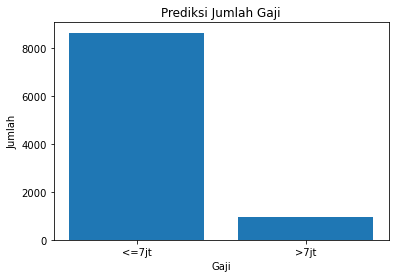

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(Daftar['Gaji'], Daftar['Jumlah'])
ax.set_xlabel('Gaji')
ax.set_ylabel('Jumlah')
ax.set_title('Prediksi Jumlah Gaji')
plt.show()

Berdasarkan visualisasi tersebut, diketahui bahwa hasil prediksi dari besarnya gaji menggunakan algoritma KNN mayoritas responden bergaji kurang dari atau sama dengan 7 juta, yaitu sebanyak 8650 orang.